# Linear Regression Practical Implementation


In [37]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [39]:
df = fetch_california_housing()
dataset = pd.DataFrame(df.data,columns=df.feature_names)



In [40]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Independent and Dependent Variables

In [41]:
x = dataset
y = df.target
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
# train test split
# basically takes a dataset and splits it into training and testing sets like 80% and 20% , 70% and 30% , 60% and 40% , etc.
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)



In [48]:
# standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [52]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [62]:
regression = LinearRegression()
regression.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
mse = cross_val_score(regression,x_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [65]:
np.mean(mse)

np.float64(-0.5268253746355758)

## Prediction

In [68]:
predicted_values = regression.predict(x_test)






In [69]:
predicted_values


array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133], shape=(6192,))

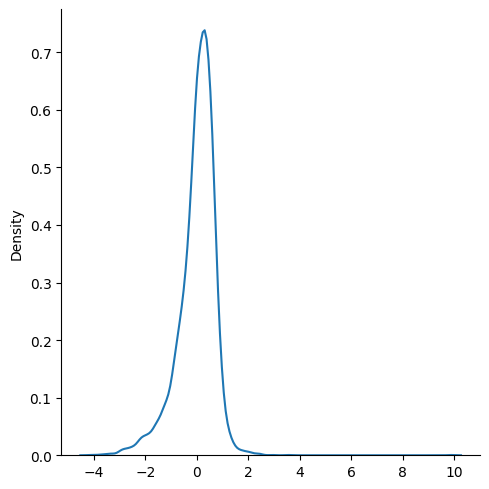

In [73]:
import seaborn as sns
sns.displot(predicted_values-y_test,kind="kde")

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted_values)


0.595770232606166